Devin Stern
Homework 5

Three observable trends: 
1)We can see from the scatter plot that the number of rides increases as the population density increases. There are more trips in urban areas than in suburban or rural areas.
2) We can also see from the scatter plot that the average fare is higher in rural areas than in more densly populated suburban or urban cities. Length of rides are likely much longer in rural areas, and there are far fewer drivers in rural areas, which could both contribute to higher fare prices. 
3) About 80% of drivers are in urban areas, but they only account for 62.7% of total fares - this is likely due to the high volume of short rides, which have a lower price point in a big city. 

In [1]:
#Devin Stern
#Homework 5


%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# File to Load (Remember to change these)
city_data_to_load =  "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
complete_data = pd.merge(city_data, ride_data, how="outer", on=["city", "city"])

# Display the data table for preview
complete_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
complete_data.columns

Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

In [3]:
#URBAN
#Create series with average fare, number of drivers, and ride count by city
urban_rd = complete_data[complete_data.type == 'Urban'].groupby('city')['ride_id'].count()
urban_dr = complete_data[complete_data.type == 'Urban'].groupby('city')['driver_count'].mean()
urban_fr = complete_data[complete_data.type == 'Urban'].groupby('city')['fare'].mean()

#Convert the urban series to dataframes
urban_rd_df = pd.DataFrame(urban_rd)
urban_dr_df = pd.DataFrame(urban_dr)
urban_fr_df = pd.DataFrame(urban_fr)


#Merge the dataframes into one Urban 
urban_df = pd.merge(urban_rd_df, urban_dr_df, how='outer', on='city')
urban_final_df = pd.merge(urban_df, urban_fr_df, how='outer', on='city')
urban_final_df

#Rename columns
urban_finalformat_df = urban_final_df.rename(columns={'ride_id': 'Ride Count',
                               'driver_count' : 'Driver Count',
                               'fare' : 'Average Fare'})

urban_finalformat_df.head()

,Ride Count,Driver Count,Average Fare
city,,,
Amandaburgh,18,12,24.641667
Barajasview,22,26,25.332273
Carriemouth,27,52,28.314444
Christopherfurt,27,41,24.501852
Deanville,19,49,25.842632


In [4]:
#SUBURBIA

#Create series with average fare, number of drivers, and ride count by city
suburb_rd = complete_data[complete_data.type == 'Suburban'].groupby('city')['ride_id'].count()
suburb_dr = complete_data[complete_data.type == 'Suburban'].groupby('city')['driver_count'].mean()
suburb_fr = complete_data[complete_data.type == 'Suburban'].groupby('city')['fare'].mean()

#Convert the suburban series to dataframes
suburb_rd_df = pd.DataFrame(suburb_rd)
suburb_dr_df = pd.DataFrame(suburb_dr)
suburb_fr_df = pd.DataFrame(suburb_fr)


#Merge the dataframes into one Suburban df
suburb_df = pd.merge(suburb_rd_df, suburb_dr_df, how='outer', on='city')
suburb_final_df = pd.merge(suburb_df, suburb_fr_df, how='outer', on='city')
suburb_final_df

#Rename columns
suburb_finalformat_df = suburb_final_df.rename(columns={'ride_id': 'Ride Count',
                               'driver_count' : 'Driver Count',
                               'fare' : 'Average Fare'})

suburb_finalformat_df.head()




,Ride Count,Driver Count,Average Fare
city,,,
Barronchester,16,11,36.422500
Bethanyland,18,22,32.956111
Brandonfort,19,10,35.437368
Colemanland,22,23,30.894545
Davidfurt,17,23,31.995882


In [5]:
#COUNTRY FOLKS

#Create series with average fare, number of drivers, and ride count by town
rural_rd = complete_data[complete_data.type == 'Rural'].groupby('city')['ride_id'].count()
rural_dr = complete_data[complete_data.type == 'Rural'].groupby('city')['driver_count'].mean()
rural_fr = complete_data[complete_data.type == 'Rural'].groupby('city')['fare'].mean()

#Convert the rural series to dataframes
rural_rd_df = pd.DataFrame(rural_rd)
rural_dr_df = pd.DataFrame(rural_dr)
rural_fr_df = pd.DataFrame(rural_fr)


#Merge the dataframes into one rural dataframe
rural_df = pd.merge(rural_rd_df, rural_dr_df, how='outer', on='city')
rural_final_df = pd.merge(rural_df, rural_fr_df, how='outer', on='city')
rural_final_df

#Rename columns
rural_finalformat_df = rural_final_df.rename(columns={'ride_id': 'Ride Count',
                               'driver_count' : 'Driver Count',
                               'fare' : 'Average Fare'})
rural_finalformat_df.head()

,Ride Count,Driver Count,Average Fare
city,,,
Bradshawfurt,10,7,40.064000
Garzaport,3,7,24.123333
Harringtonfort,6,4,33.470000
Jessicaport,6,1,36.013333
Lake Jamie,6,4,34.358333


## Bubble Plot of Ride Sharing Data

## Total Fares by City Type

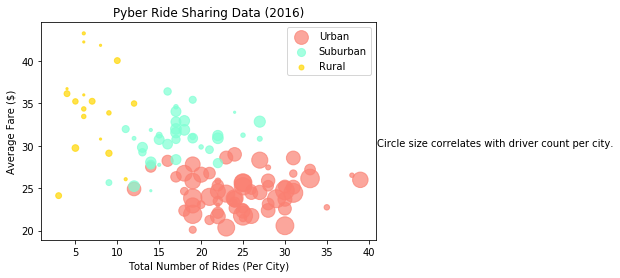

In [6]:
#Set up the general layout of the plot
plt.title ("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#Set handle for each set of data

Urban = plt.scatter(urban_rd, urban_fr, s=5*urban_dr,marker='o', color="salmon", alpha=0.7, label = "Urban")
Suburban = plt.scatter(suburb_rd, suburb_fr,s=5*suburb_dr, marker='o', color="aquamarine", alpha=0.7, label = "Suburban")
Rural = plt.scatter(rural_rd, rural_fr, s=5*rural_dr, marker='o', color ="gold", alpha=0.7,label= "Rural")


#Create legend
plt.legend(handles=[Urban, Suburban, Rural], loc="best")

#Add a note
plt.text(41,30, 'Circle size correlates with driver count per city.')


# Save an image of our chart and print the final product to the screen
plt.savefig("../Homework5/PyberScatter.png")



In [7]:
#Total Fares by City Type
fares_by_type = complete_data.groupby('type')['ride_id'].count()


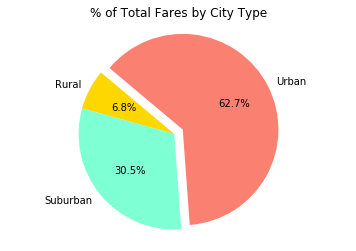

In [8]:
#Create Labels for each section of the pie chart
labels = ["Rural", "Suburban", "Urban"]

#Input values for each label
total_fares = [4327.93, 19356.33, 39854.38]

#Create Colors for each label
colors = ["gold", "aquamarine", "salmon"]

#Add an explosion
explode = [0,0,0.1]

#Create pie chart based on values above
plt.pie(total_fares, labels=labels, colors=colors, explode=explode,
        autopct = "%1.1f%%", startangle=140)

#Add a title
plt.title("% of Total Fares by City Type")


# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("../Homework5/PyberPie.png")

## Total Rides by City Type

In [9]:
# Total Rides by City Type
rides_by_type = complete_data.groupby('type')['ride_id'].count()
rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

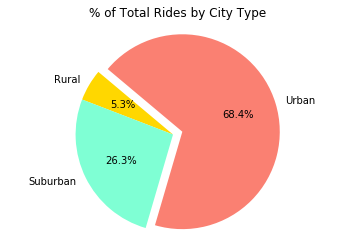

In [10]:
#Create Labels for each section of the pie chart
labels = ["Rural", "Suburban", "Urban"]

#Input values for each label
total_rides = [125, 625, 1625]

#Create Colors for each label
colors = ["gold", "aquamarine", "salmon"]

#Add an explosion
explode = [0,0,0.1]

#Create pie chart based on values above
plt.pie(total_rides, labels=labels, colors=colors, explode=explode,
        autopct = "%1.1f%%", startangle=140)

#Add a title
plt.title("% of Total Rides by City Type")


# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("../Homework5/PyberPieRides.png")

## Total Drivers by City Type

In [11]:
# Total Urban Driver Count
urban_dr = complete_data[complete_data.type == 'Urban'].groupby('city')['driver_count'].unique()
urban_dr.sum()

array([2405], dtype=int64)

In [12]:
#Total Suburban Driver Count
suburb_dr = complete_data[complete_data.type == 'Suburban'].groupby('city')['driver_count'].unique()
suburb_dr.sum()

array([490], dtype=int64)

In [13]:
#Total Rural Driver Count
rural_dr = complete_data[complete_data.type == 'Rural'].groupby('city')['driver_count'].unique()
rural_dr.sum()

array([78], dtype=int64)

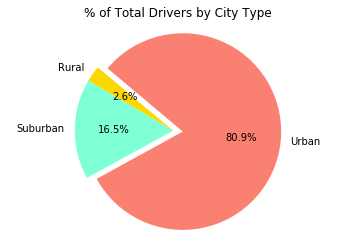

In [14]:
#Create Labels for each section of the pie chart
labels = ["Rural", "Suburban", "Urban"]

#Input values for each label
total_drivers = [78, 490, 2405]

#Create Colors for each label
colors = ["gold", "aquamarine", "salmon"]

#Add an explosion
explode = [0,0,0.1]

#Create pie chart based on values above
plt.pie(total_drivers, labels=labels, colors=colors, explode=explode,
        autopct = "%1.1f%%", startangle=140)

#Add a title
plt.title("% of Total Drivers by City Type")


# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("../Homework5/PyberPieDrivers.png")